# SHAP

#### Import the libraries

In [127]:
import xgboost
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
# load JS visualization code to notebook
shap.initjs()

In [ ]:
data = 'ant'

#### Read the data

In [129]:
# read the data
x = pd.read_csv('../experiments/tomcat.csv', index_col=0)
y = x['bug']

In [130]:
# ant ['lcom', 'dam']
# df = x[['lcom', 'dam', 'bug']].copy()

# camel ['ca', 'npm', 'mfa']
# df = x[['ca', 'npm', 'mfa', 'bug']].copy()

# jedit ['max_cc']
# df = x[['max_cc', 'bug']].copy()

# log4j ['npm', 'dam']
# df = x[['npm', 'dam', 'bug']].copy()

# lucene ['rfc', 'dam']
# df = x[['rfc', 'dam', 'bug']].copy()

# prop ['amc']
# df = x[['amc', 'bug']].copy()

# tomcat ['loc']
# df = x[['loc', 'bug']].copy()

# xalan ['lcom3', 'mfa']
# df = x[['lcom3', 'mfa', 'bug']].copy()

#### Normalize the dataset

In [131]:
# delete unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# convert all columns of DataFrame
df = df.dropna()
# find the objects columns
cols = df.columns[df.dtypes.eq('object')]
# convert to numeric these columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [132]:
df.shape

(858, 2)

#### Separate the data

In [133]:
# separating X and y
cols = [col for col in df.columns if col not in ['bug']]
X = df[cols]

In [134]:
# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

In [135]:
# explain the model's predictions using SHAP values.
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

#### Summary plot

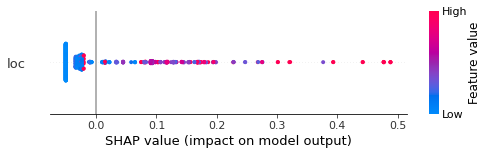

In [136]:
shap.summary_plot(shap_values, X, max_display=10, show=False)
plt.savefig('../reports/tomcat-summary.png',bbox_inches='tight')

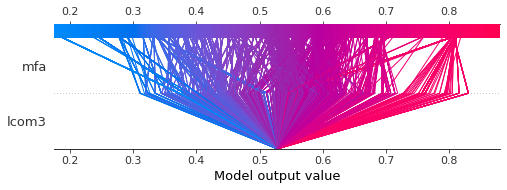

In [125]:
shap.decision_plot(
    explainer.expected_value,
    shap_values,
    X,
    feature_display_range=slice(None, -200, -1),
    link='identity',
    feature_order='hclust',
    #feature_names=WANTED_COLUMNS,
    #show=False,
    ignore_warnings=True
)

#### Local Explanation

In [30]:
#shap.force_plot(explainer.expected_value, shap_values, X, link='identity')

In [163]:
#shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:])

In [164]:
#shap.force_plot(explainer.expected_value, shap_values[31,:], X.iloc[31,:])

#### That's all folks!!!